# Coursework 2: Image Classification

In this coursework, we are going to develop a neural network model for for image classification.

What to do?

* The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are supposed to implement.

* First, run `jupyter-lab` or `jupyter-notebook` in the terminal to start the Jupyter notebook.

* Then, complete and run the code to get the results.

* Finally, please export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and answers, and upload the pdf file onto Cate.

Dependencies:

* If you work on a college computer in the Computer Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where required Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_2020/bin/activate`

When you no longer need the virtual environment, you can exit it by running `deactivate`.

* If you work on your own laptop using either Anaconda or plain Python, you can install new packages (such as numpy, imageio etc) running `conda install [package_name]` or `pip3 install [package_name]` in the terminal.

In [1]:
# Import libraries (provided)
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import time
import random
from sklearn import metrics
import torch
import torch.nn as nn
import torch.nn.functional as FSS
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import seaborn as sns 

# 1. Load and visualise data. (25 marks)

Throughout this coursework. you will be working with the Fashion-MNIST dataset. If you are interested, you may find information about the dataset in this paper.

[1] Han Xiao, Kashif Rasul, Roland Vollgraf. Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The dataset is prepared in a similar way to MNIST. It is split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

In [2]:
# Load data (provided)
train_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=True,transform=transforms.ToTensor())
train_image = np.array(train_set.data)
train_label = np.array(train_set.targets)
class_name = train_set.classes

test_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=False)
test_image = np.array(test_set.data)
test_label = np.array(test_set.targets)

### 1.1 Display the dimension of the training and test sets. (5 marks)

In [3]:
print(f"Training image dim: {train_image.shape}")
print(f"Testing image dim: {test_image.shape}")

print(f"Training label: {train_label[0:300]}")

arr = np.where(train_label[0:300]==0)
print(f"Index: {arr[0][1]}")


Training image dim: (60000, 28, 28)
Testing image dim: (10000, 28, 28)
Training label: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8 8 0 1 1 6 8 1 9 7 8 8
 9 6 6 3 1 5 4 6 7 5 5 9 2 2 2 7 6 4 1 8 7 7 5 4 2 9 1 7 4 6 9 7 1 8 7 1 2
 8 0 9 1 8 7 0 5 8 6 7 2 0 8 7 1 6 2 1 9 6 0 1 0 5 5 1 7 0 5 8 4 0 4 0 6 6
 4 0 0 4 7 3 0 5 8 4 1 1 2 9 2 8 5 0 6 3 4 6 0 9 1 7 3 8 5 8 3 8 5 2 0 8 7
 0 3 5 0 6 5 2 7 5 2 6 8 2 6 8 0 4 4 4 4 4 1 5 6 5 3 3 7 3 3 6 2 8 4 6 5 9
 3 2 3 2 4 4 8 2 5 3 0 7 2 0 2 5 7 2 3 1 7 6 2 9 1 9 1 1 8 7 8 4 2 6 6 7 9
 4 6 1 9]
Index: 2


### 1.2 Visualise sample images for each of the 10 classes. (10 marks)

Please plot 10 rows x 10 columns of images. Each row shows 10 samples for one class. For example, row 1 shows 10 `T-shirt/top` images, row 2 shows 10 `Trousers` images.

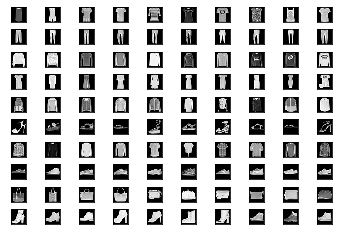

In [4]:
# Let's visualize some examples
N=10
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
# items = list(range(0, 10))

for row in range(N):
  arr = np.where(train_label[start_val:start_val+300]==row)
  for col in range(N):
    # idx = start_val+row+N*col
    idx = arr[0][col+1]
    axes[row,col].imshow(train_image[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    # fig.subplots_adjust(xspace=0.5)
    target = str(train_label[idx])
    # axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])

### 1.3 Display the number of training samples for each class. (5 marks)

In [4]:
name_list = ['top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

for i in range(10):
    arr = np.where(train_label[0:]==i)
    print(f"{name_list[i]}: {len(arr[0])} \n")
# * 0: T-shirt/top
# * 1: Trousers
# * 2: Pullover
# * 3: Dress
# * 4: Coat
# * 5: Sandal
# * 6: Shirt
# * 7: Sneaker
# * 8: Bag
# * 9: Ankle boot

top: 6000 

Trousers: 6000 

Pullover: 6000 

Dress: 6000 

Coat: 6000 

Sandal: 6000 

Shirt: 6000 

Sneaker: 6000 

Bag: 6000 

Ankle boot: 6000 



### 1.4 Discussion. (5 marks)
Is the dataset balanced? What would happen for the image classification task if the dataset is not balanced? 
The dataset is balanced in terms of number of images per class. If the dataset is not balanced, the trained model would be biased such that the test output would be biased as well.

## 2. Image classification. (60 marks)

### 2.1 Build a convolutional neural network using the `PyTorch` library to perform classification on the Fashion-MNIST dataset. (15 marks)

You can use a network architecture similar to LeNet (shown below), which consists a number of convolutional layers and a few fully connected layers at the end.

![](lenet.png)

In [3]:

class cnnNet(nn.Module):
    def __init__(self):
        super(cnnNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5,stride=1)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5,stride=1)
        # self.conv3 = nn.Conv2d(16,128,kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(256,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self,x):
        in_size = x.size(0)
        out = self.mp(self.relu(self.conv1(x)))
        out = self.mp(self.relu(self.conv2(out)))
        # out = self.relu(self.conv3(out))
        out = out.view(in_size, -1)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)
        return self.logsoftmax(out)


In [4]:
model = cnnNet()
print(model)

cnnNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (logsoftmax): LogSoftmax()
)


### 2.2 Define the loss function, optimiser and hyper-parameters such as the learning rate, number of iterations, batch size etc. (5 marks)

In [23]:
# Define optimizer used
optimizer = optim.Adam(model.parameters(),lr=0.005)
# Define Loss function used
lossfunc = nn.CrossEntropyLoss()
# Batch size
batch_size = 64
# Number of epochs
n_epochs = 20


### 2.3 Start model training. (20 marks)

At each iteration, get a random batch of images and labels from train_image and train_label, convert them into torch tensors, feed into the network model and perform gradient descent. Please also evaluate how long it takes for training.

In [24]:
train_losses = []
start_time = time.process_time()
train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size, shuffle=True)
for epoch in range(n_epochs):
    
    total_step = len(train_loader)
    for i,(images,labels) in enumerate(train_loader):
        optimizer.zero_grad()
        model.train() # Enables Training mode
        tr_loss = 0

        # print()
        output_train = model(images)

        # compute the loss
        loss_train = lossfunc(output_train,labels)
        # Keep all loss
        train_losses.append(loss_train)

        # Compute and update weights
        loss_train.backward()
        optimizer.step() # Performs single opt step

        total = labels.size(0)
        _,predicted = torch.max(output_train.data,1)
        correct = (predicted == labels).sum().item()
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Acc:{:.3f}'.format(epoch+1, n_epochs, i+1, total_step, loss_train.item(), correct/total*100))
end_time = time.process_time() 
print(f"Time taken: {end_time-start_time}s")

Epoch [1/20], Step [938/938], Loss: 0.3644, Acc:87.500
Epoch [2/20], Step [938/938], Loss: 0.3603, Acc:81.250
Epoch [3/20], Step [938/938], Loss: 0.2444, Acc:90.625
Epoch [4/20], Step [938/938], Loss: 0.4551, Acc:90.625
Epoch [5/20], Step [938/938], Loss: 0.2899, Acc:90.625
Epoch [6/20], Step [938/938], Loss: 0.3002, Acc:84.375
Epoch [7/20], Step [938/938], Loss: 0.2451, Acc:87.500
Epoch [8/20], Step [938/938], Loss: 0.1966, Acc:90.625
Epoch [9/20], Step [938/938], Loss: 0.1783, Acc:96.875
Epoch [10/20], Step [938/938], Loss: 0.3843, Acc:87.500
Epoch [11/20], Step [938/938], Loss: 0.1670, Acc:93.750
Epoch [12/20], Step [938/938], Loss: 0.3947, Acc:81.250
Epoch [13/20], Step [938/938], Loss: 0.4542, Acc:78.125
Epoch [14/20], Step [938/938], Loss: 0.1231, Acc:100.000
Epoch [15/20], Step [938/938], Loss: 0.4649, Acc:75.000
Epoch [16/20], Step [938/938], Loss: 0.2141, Acc:90.625
Epoch [17/20], Step [938/938], Loss: 0.2974, Acc:90.625
Epoch [18/20], Step [938/938], Loss: 0.4058, Acc:84.375


### 2.4 Deploy the trained model onto the test set. (10 marks)
Please also evaluate how long it takes for testing.

In [25]:
test_image = torch.Tensor(test_image)
test_label = torch.Tensor(test_label)
test_image = test_image.reshape(-1,1,28,28)
test_data = torch.utils.data.TensorDataset(test_image,test_label)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

acc_cof =0
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    start_time = time.process_time()
    for images, labels in test_loader:
        outputs = model(images)
        # print(images.shape)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # print(f"Pre: {predicted}")
        # print(f"Lab: {labels}")
        cof_mat = np.array(metrics.confusion_matrix(labels,predicted))
        if cof_mat.shape != (10,10):
            continue
        else:
            acc_cof+=cof_mat
    end_time = time.process_time()        
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
    print(f"Time taken: {end_time-start_time}s")
# acc_cof =0
# test_loader = torch.utils.data.DataLoader(dataset=test_set,batch_size=batch_size, shuffle=False)
# model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         outputs = model(images)
# #         print(images.shape)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#         cof_mat = np.array(metrics.confusion_matrix(labels,predicted))
#         if cof_mat.shape != (10,10):
#             continue
#         else:
#             acc_cof+=cof_mat


Test Accuracy of the model on the 10000 test images: 67.66 %
Time taken: 3.421875s


### 2.5 Evaluate the classification accuracy on the test set. (5 marks)

In [26]:
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 10000 test images: 67.66 %


### 2.6 Print out and visualise the confusion matrix. (5 marks)
You can use relevant functions in [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

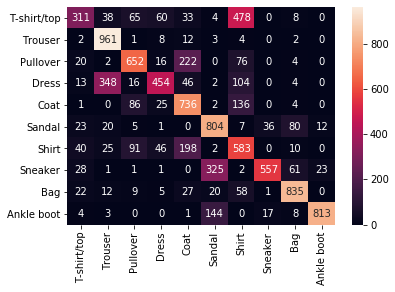

In [27]:
# print(acc_cof)
# plt.imshow(acc_cof)

# fig, ax = plt.subplots()

# im = ax.imshow(acc_cof)

# # We want to show all ticks...
# ax.set_xticks(np.arange(len(class_name)))
# ax.set_yticks(np.arange(len(class_name)))
# # ... and label them with the respective list entries
# ax.set_xticklabels(class_name)
# ax.set_yticklabels(class_name)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(class_name)):
#     for j in range(len(class_name)):
#         text = ax.text(j, i, acc_cof[i, j],
#                        ha="center", va="center", color="w")

# # ax.set_title("Harvest of local farmers (in tons/year)")
# # fig.tight_layout()
# plt.figure(figsize = (10,10))
# plt.show()

# import seaborn as sns 
# sns.set()
ax = sns.heatmap(acc_cof,fmt = "d",annot=True,xticklabels = class_name,yticklabels = class_name)


## 3. Deploy in real world. (15 marks)

Take 3 photos that belongs to the 10 classes (e.g. clothes, shoes) in your real life. Use either Python or other software (Photoshop, Gimp etc) to convert the photos into grayscale, negate the intensities so that background becomes black or dark, crop the region of interest and reshape into the size of 28x28.

### 3.1 Load and visualise your own images (5 marks)

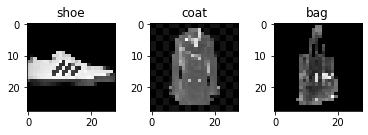

In [13]:
# img = matplotlib.image.imread('~/winDesktop/Computer-Vision/coursework_2/shoe.png')
# plt.imshow(img)
import cv2
inputs = ['shoe', 'coat' ,'bag']
figs = np.array([])
# fig, axes = plt.subplots(1,3)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for idx,input in enumerate(inputs):
    img = cv2.imread(str(input)+'.png')
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    neg = np.subtract(255,gray_img)
    re_neg = cv2.resize(neg,(28,28))
    figs = np.append(figs,re_neg)
    ax = fig.add_subplot(1, 3, idx+1)
    ax.imshow(re_neg,cmap='gray')
    ax.title.set_text(str(input))

### 3.2 Test your network on the real images and display the classification results. (5 marks)

In [28]:
shaped = figs.reshape(-1,1,28,28)
tens = torch.from_numpy(shaped).float()
outputs = model(tens)
_, predicted = torch.max(outputs.data, 1)
for i in range(3):
    print(f"Found class: {class_name[predicted[i]]}")



Found class: Sandal
Found class: Shirt
Found class: Sandal


### 3.3 Discuss the classification results. (5 marks)

Does the model work? Is there anyway to improve the real life performance of the model?
The model works as predicted. Howver, since the classification is not perfect, misclassification occured. Increasing the dimensions of data might be useful but would increase the amount of computation required. 